In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from tabulate import tabulate


In [107]:
df = pd.read_csv('/Users/PANKAJ/Desktop/train1_final1.csv')


# EXPLORATORY DATA ANALYSIS

In [108]:
df.head()

,Loan_ID,Gender,Married,ROI,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,6,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,6,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,6,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,6,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,6,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [109]:
df.columns=df.columns.str.lower()
#To ensure consistency in the naming convention throughout the DataFrame. It helps avoid confusion and makes it 
#easier to reference columns consistently in our code.

In [110]:
df.head()

,loan_id,gender,married,roi,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,6,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,6,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,6,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,6,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,6,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [111]:
df.shape

(1029, 14)

# Value count for categorical data.

In [112]:
value_counts = df['gender'].value_counts()
print(value_counts)


Male      813
Female    194
Name: gender, dtype: int64


In [113]:
value_counts = df['married'].value_counts()
print(value_counts)


Yes    549
No     475
0        2
Name: married, dtype: int64


In [114]:
value_counts = df['dependents'].value_counts()
print(value_counts)


0     345
1     337
2     245
3+     87
Name: dependents, dtype: int64


In [115]:
value_counts = df['education'].value_counts()
print(value_counts)


Graduate        576
Not Graduate    453
Name: education, dtype: int64


In [116]:
value_counts = df['self_employed'].value_counts()
print(value_counts)


No     836
Yes    140
Name: self_employed, dtype: int64


In [117]:
value_counts = df['property_area'].value_counts()
print(value_counts)


Semiurban    368
Rural        334
Urban        327
Name: property_area, dtype: int64


In [118]:
value_counts = df['loan_status'].value_counts()
print(value_counts)


Y    711
N    318
Name: loan_status, dtype: int64


In [119]:
df.dtypes

loan_id               object
gender                object
married               object
roi                    int64
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [120]:
df.describe()

,roi,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,1029.0,1029.000000,1029.000000,994.000000,1009.000000,945.000000
mean,6.0,5380.814383,1612.823946,146357.142857,342.124876,0.841270
std,0.0,6101.944084,3064.272166,84056.664664,64.743605,0.365618
min,6.0,150.000000,0.000000,9000.000000,36.000000,0.000000
25%,6.0,2876.000000,0.000000,100000.000000,360.000000,1.000000
50%,6.0,3812.000000,1131.000000,128000.000000,360.000000,1.000000
75%,6.0,5815.000000,2250.000000,165000.000000,360.000000,1.000000
max,6.0,81000.000000,41667.000000,700000.000000,480.000000,1.000000


## Visualization of Numerical Variables using Histogram

In [121]:
import plotly.express as px
SP = px.histogram(df, x='applicantincome',
                         title='Histogram of Applicant Income', height=450,
                         color_discrete_sequence=['#03DAC5'],
                         )
SP

In [122]:
SP = px.histogram(df, x='coapplicantincome',
                         title='Histogram of Coapplicant Income', height=450,
                         color_discrete_sequence=['#03DAC5'],
                         )
SP

In [123]:
SP = px.histogram(df, x='loanamount',
                         title='Histogram of Loan Amount', height=450,
                         color_discrete_sequence=['#03DAC5'],
                         )
SP

In [124]:
SP = px.histogram(df, x='loan_amount_term',
                         title='Histogram of Loan amount term', height=450,
                         color_discrete_sequence=['#03DAC5'],
                         )
SP

In [125]:
SP = px.histogram(df, x='credit_history',
                         title='Histogram of Credit history', height=450,
                         color_discrete_sequence=['#03DAC5'],
                         )
SP
### Is it looking good? should we remove it??

# Outliers Treatment in Numerical variables

In [126]:
# Box plot for Applicant Income
fig = px.box(df['applicantincome'])
fig.show()

In [127]:
# Outlier detection for Applicant Income.
q1 = df['applicantincome'].quantile(0.25)
q3 = df['applicantincome'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['applicantincome'] < lower_bound) | (df['applicantincome'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))


Quartile 1 (Q1): 2876.0
Quartile 3 (Q3): 5815.0
Interquartile Range (IQR): 2939.0
Lower Bound for Outliers: -1532.5
Upper Bound for Outliers: 10223.5
Number of Outliers: 81


In [128]:
print(outliers['applicantincome'])


9       12841
34      12500
54      11500
67      10750
102     13650
        ...  
949     18165
976     19484
987     16666
1009    16120
1019    12000
Name: applicantincome, Length: 81, dtype: int64


In [129]:
df['applicantincome']=df['applicantincome'].clip(150,10223)
##The clip() function is a convenient method in pandas that limits the values of a Series or DataFrame column 
##to a specified range. In this case, it is applied to the 'loanamount' column.
##Any values in the 'loanamount' column that are less than 150 (lowest value in dataset) will be set to 150, and any values greater than 
##10223(upper bound) will be set to 10223. This operation ensures that all values in the 'loanamount' column fall within the 
##specified range.

In [130]:
fig = px.box(df['applicantincome'])
fig.show()
## No more outliers

In [131]:
# Box plot for Coapplicant Income
fig = px.box(df['coapplicantincome'])
fig.show()

In [132]:
# Outlier detection for Coapplicant Income.
q1 = df['coapplicantincome'].quantile(0.25)
q3 = df['coapplicantincome'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['coapplicantincome'] < lower_bound) | (df['coapplicantincome'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 0.0
Quartile 3 (Q3): 2250.0
Interquartile Range (IQR): 2250.0
Lower Bound for Outliers: -3375.0
Upper Bound for Outliers: 5625.0
Number of Outliers: 32


In [133]:
df['coapplicantincome']=df['coapplicantincome'].clip(0,5625)

In [134]:
fig = px.box(df['coapplicantincome'])
fig.show()
# No outliers anymore.

In [135]:
# Box plot for Loan amount.
fig = px.box(df['loanamount'])
fig.show()

In [136]:
# Outlier detection for Loan amount.
q1 = df['loanamount'].quantile(0.25)
q3 = df['loanamount'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['loanamount'] < lower_bound) | (df['loanamount'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 100000.0
Quartile 3 (Q3): 165000.0
Interquartile Range (IQR): 65000.0
Lower Bound for Outliers: 2500.0
Upper Bound for Outliers: 262500.0
Number of Outliers: 68


In [137]:
df['loanamount']=df['loanamount'].clip(9000,265000)

In [138]:
fig = px.box(df['loanamount'])
fig.show()
# No outliers anymore.

In [139]:
# Box plot for Loan amount term.
fig = px.box(df['loan_amount_term'])
fig.show()

In [140]:
# Outlier detection for Loan amount term.
q1 = df['loan_amount_term'].quantile(0.25)
q3 = df['loan_amount_term'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['loan_amount_term'] < lower_bound) | (df['loan_amount_term'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 360.0
Quartile 3 (Q3): 360.0
Interquartile Range (IQR): 0.0
Lower Bound for Outliers: 360.0
Upper Bound for Outliers: 360.0
Number of Outliers: 147


In [141]:
df['loan_amount_term']=df['loan_amount_term'].clip(36,360)
# Because 36 is the lowest value in data.

In [142]:
fig = px.box(df['loan_amount_term'])
fig.show()


In [143]:
df.dtypes

loan_id               object
gender                object
married               object
roi                    int64
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [144]:
df.corr() 

,roi,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
roi,NaN,NaN,NaN,NaN,NaN,NaN
applicantincome,NaN,1.000000,-0.236206,0.561049,0.021292,0.050178
coapplicantincome,NaN,-0.236206,1.000000,0.253857,-0.046188,0.001151
loanamount,NaN,0.561049,0.253857,1.000000,0.077423,0.011805
loan_amount_term,NaN,0.021292,-0.046188,0.077423,1.000000,0.010424
credit_history,NaN,0.050178,0.001151,0.011805,0.010424,1.000000


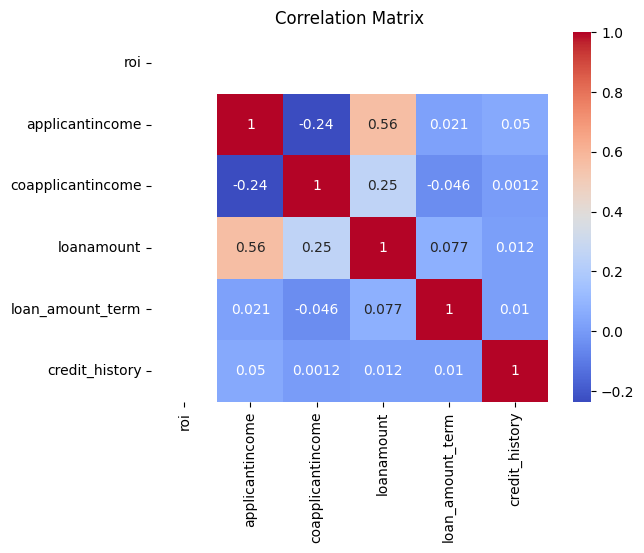

In [145]:
# Creating a correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Bivariate analysis

In [146]:
#Stacked Bar charts.
import plotly.graph_objects as go
counts = df.groupby(['loan_status', 'married']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Married(Yes)', x=counts.index, y=counts['Yes']),
    go.Bar(name='Not Married(No)', x=counts.index, y=counts['No'])
])

# Set the layout
fig.update_layout(
    title='Loan Status by Marital Status',
    xaxis_title='Loan Status',
    yaxis_title='Count',
    barmode='stack'  
)
fig.show()

In [147]:
counts = df.groupby(['loan_status', 'self_employed']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='self_employed(Yes)', x=counts.index, y=counts['Yes']),
    go.Bar(name='Not self_employed(No)', x=counts.index, y=counts['No'])
])

# Set the layout
fig.update_layout(
    title='Loan Status by Employment Status',
    xaxis_title='Loan Status',
    yaxis_title='Count',
    barmode='stack'  
)
fig.show()

In [148]:
counts = df.groupby(['loan_status', 'property_area']).size().unstack(fill_value=0)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Rural', x=counts.index, y=counts['Rural']),
    go.Bar(name='Urban', x=counts.index, y=counts['Urban']),
    go.Bar(name='Semi Urban', x=counts.index, y=counts['Semiurban'])
])

# Set the layout
fig.update_layout(
    title='Loan Status by Area of property',
    xaxis_title='Loan Status',
    yaxis_title='Count',
    barmode='stack'  
)
fig.show()

In [149]:
df.columns

Index(['loan_id', 'gender', 'married', 'roi', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

## Null value imputation

In [150]:
df.isna().sum()

loan_id               0
gender               22
married               3
roi                   0
dependents           15
education             0
self_employed        53
applicantincome       0
coapplicantincome     0
loanamount           35
loan_amount_term     20
credit_history       84
property_area         0
loan_status           0
dtype: int64

In [151]:
df['gender'].value_counts()

Male      813
Female    194
Name: gender, dtype: int64

In [152]:
# Filling NA's in gender column with its modal value
df['gender']=df['gender'].fillna('Male')

In [153]:
df['married'].value_counts()

Yes    549
No     475
0        2
Name: married, dtype: int64

In [154]:
# Filling NA's in married column with its modal value
df['married']=df['married'].fillna('Yes')

In [155]:
# Imputing dependents column.
value_counts = df['dependents'].value_counts()
value_counts

0     345
1     337
2     245
3+     87
Name: dependents, dtype: int64

In [156]:
# Removing 3+ with 3.
c = {'3+':'3','2':'2','1': '1','0': '0'}
df['dependents']=df['dependents'].map(c) 

In [157]:
value_counts = df['dependents'].value_counts()
value_counts

0    345
1    337
2    245
3     87
Name: dependents, dtype: int64

In [158]:
# Filling NA's in dependents column with its modal value.
df['dependents']=df['dependents'].fillna('0')

In [159]:
value_counts = df['dependents'].value_counts()
value_counts

0    360
1    337
2    245
3     87
Name: dependents, dtype: int64

In [160]:
# Imputation for self_employed column.
df['self_employed'].value_counts()

No     836
Yes    140
Name: self_employed, dtype: int64

In [161]:
# Filling NA's in self_employed column with its modal value.
df['self_employed']=df['self_employed'].fillna('No')

In [162]:
# Filling NA's in loanamount column with its mean value.
df['loanamount']=df['loanamount'].fillna(df['loanamount'].mean()) 

In [163]:
value_counts = df['loan_amount_term'].value_counts()
value_counts

360.0    887
180.0     74
300.0     22
84.0      10
240.0      6
36.0       4
120.0      3
60.0       3
Name: loan_amount_term, dtype: int64

In [164]:
# Filling NA's in loan_amount_term column with its modal value.
df['loan_amount_term']=df['loan_amount_term'].fillna(360)

In [165]:
# Imputation for credit_history.
df['credit_history'].value_counts()

1.0    795
0.0    150
Name: credit_history, dtype: int64

In [166]:
df['credit_history']=df['credit_history'].fillna(1)

In [167]:
df.isna().sum()
# All columns are having zero null values.

loan_id              0
gender               0
married              0
roi                  0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [168]:
df.columns

Index(['loan_id', 'gender', 'married', 'roi', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

## Feature construction.

In [169]:
# Creating sumofincome column for which is combination of applicant's and coapplicant's income.
df['sumofincome']=df['applicantincome']+df['coapplicantincome'] 

In [170]:
# Removing columns applicantincome and coapplicantincome.
delcolumns =['applicantincome','coapplicantincome']
df.drop(delcolumns,axis=1,inplace=True)

In [171]:
!pip install numpy-financial
import numpy_financial as npf

In [172]:
#Creating and adding a new EMI column to the dataframe.
emi = npf.pmt(df['roi'] / 1200, df['loan_amount_term'], -df['loanamount']) 
# Div by 1200 to calculate monthly interest rate i.e 12*100, division by 12 is for making it monthly and 100 is for rate

# Adding the EMI column to the DataFrame
df['EMI'] = emi

In [173]:
# Creating and adding a new EMI/NMI(Net monthly income) ratio column.                           
emi_column = df['EMI'] 
income_column = df['sumofincome'] 

emi_nmi_ratio = emi_column / income_column

# Adding the EMI/NMI ratio as a new column
df['EMI/NMI'] = emi_nmi_ratio
print(df)


       loan_id  gender married  roi dependents     education self_employed  \
0     LP001002    Male      No    6          0      Graduate            No   
1     LP001003    Male     Yes    6          1      Graduate            No   
2     LP001005    Male     Yes    6          0      Graduate           Yes   
3     LP001006    Male     Yes    6          0  Not Graduate            No   
4     LP001008    Male      No    6          0      Graduate            No   
...        ...     ...     ...  ...        ...           ...           ...   
1024  LP003410  Female     Yes    6          1  Not Graduate            No   
1025  LP003411    Male      No    6          3  Not Graduate            No   
1026  LP003412    Male      No    6          2  Not Graduate            No   
1027  LP003413    Male      No    6          2  Not Graduate            No   
1028  LP003414  Female     Yes    6          1  Not Graduate           Yes   

         loanamount  loan_amount_term  credit_history property_

In [174]:
min_emi_nmi = df[df['loan_status'] == 'Y']['EMI/NMI'].min()
print("Minimum EMI/NMI for loan approval (status = 'Yes'): ", min_emi_nmi)


Minimum EMI/NMI for loan approval (status = 'Yes'):  0.023458887807992056


In [175]:
max_emi_nmi = df[df['loan_status'] == 'Y']['EMI/NMI'].max()
print("Maximum EMI/NMI for loan approval (status = 'Yes'): ", max_emi_nmi)


Maximum EMI/NMI for loan approval (status = 'Yes'):  0.49589809897487197


In [176]:
df.columns

Index(['loan_id', 'gender', 'married', 'roi', 'dependents', 'education',
       'self_employed', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status', 'sumofincome', 'EMI', 'EMI/NMI'],
      dtype='object')

In [177]:
column_name = 'EMI/NMI'
nan_count = df[column_name].isna().sum()

# Print the count of NaN values
print("Number of NaN values in '", column_name, "' column:", nan_count)

Number of NaN values in ' EMI/NMI ' column: 0


In [178]:
# Preparing to model.
df.drop(columns='loan_id',axis=1,inplace=True)
df.drop(columns='roi',axis=1,inplace=True)

In [179]:
#Pairplot to find the relation between different variables.

dff = df[['gender', 'married', 'dependents', 'education', 'self_employed',
       'loanamount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'sumofincome', 'EMI', 'EMI/NMI']]
fig_pairplot = px.scatter_matrix(dff, height=1000,title= 'Correlation between whole Data')  
fig_pairplot

## Important features selection.

In [180]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'loanamount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'sumofincome', 'EMI', 'EMI/NMI'],
      dtype='object')

In [181]:

# Train test split.
train,test = train_test_split(df,test_size=0.10,random_state=0)
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

shape of training data :  (926, 13)
shape of testing data (103, 13)


In [182]:
##Separating the target and independent variable
train_x = train.drop(columns=['loan_status'],axis=1)
train_y = train['loan_status']
test_x = test.drop(columns=['loan_status'],axis=1)
test_y = test['loan_status']

In [183]:
df1 = df.copy()

In [184]:
##Label Encoding of categorical variables.
var_mod = ['gender','married','dependents','education','self_employed','property_area','loan_status']
le = LabelEncoder()
for i in var_mod:
    df1[i] = le.fit_transform(df[i])
df1.dtypes

gender                int64
married               int64
dependents            int64
education             int64
self_employed         int64
loanamount          float64
loan_amount_term    float64
credit_history      float64
property_area         int64
loan_status           int64
sumofincome         float64
EMI                 float64
EMI/NMI             float64
dtype: object

In [185]:
df1.head(10)

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,sumofincome,EMI,EMI/NMI
0,1,1,0,0,0,138079.476861,360.0,1.0,2,1,5849.0,827.856229,0.141538
1,1,2,1,0,0,128000.000000,360.0,1.0,0,0,6091.0,767.424672,0.125993
2,1,2,0,0,1,66000.000000,360.0,1.0,2,1,3000.0,395.703347,0.131901
3,1,2,0,1,0,120000.000000,360.0,1.0,2,1,4941.0,719.460630,0.145610
4,1,1,0,0,0,141000.000000,360.0,1.0,2,1,6000.0,845.366240,0.140894
5,1,2,2,0,1,265000.000000,360.0,1.0,2,1,9613.0,1588.808892,0.165277
6,1,2,0,1,0,95000.000000,360.0,1.0,2,1,3849.0,569.572999,0.147979
7,1,2,3,0,0,158000.000000,360.0,0.0,1,0,5540.0,947.289830,0.170991
8,1,2,2,0,0,168000.000000,360.0,1.0,2,1,5532.0,1007.244882,0.182076
9,1,2,1,0,0,265000.000000,360.0,1.0,1,0,15848.0,1588.808892,0.100253


In [186]:
df.head()

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,sumofincome,EMI,EMI/NMI
0,Male,No,0,Graduate,No,138079.476861,360.0,1.0,Urban,Y,5849.0,827.856229,0.141538
1,Male,Yes,1,Graduate,No,128000.000000,360.0,1.0,Rural,N,6091.0,767.424672,0.125993
2,Male,Yes,0,Graduate,Yes,66000.000000,360.0,1.0,Urban,Y,3000.0,395.703347,0.131901
3,Male,Yes,0,Not Graduate,No,120000.000000,360.0,1.0,Urban,Y,4941.0,719.460630,0.145610
4,Male,No,0,Graduate,No,141000.000000,360.0,1.0,Urban,Y,6000.0,845.366240,0.140894


In [187]:
# Performing again the Train test split post label encoding.
train1,test1 = train_test_split(df1,test_size=0.10,random_state=0)
print('shape of training data : ',train1.shape)
print('shape of testing data',test1.shape)

##Separating the target and independent variable again
train1_x = train1.drop(columns=['loan_status'],axis=1)
train1_y = train1['loan_status']
test1_x = test1.drop(columns=['loan_status'],axis=1)
test1_y = test1['loan_status']

shape of training data :  (926, 13)
shape of testing data (103, 13)


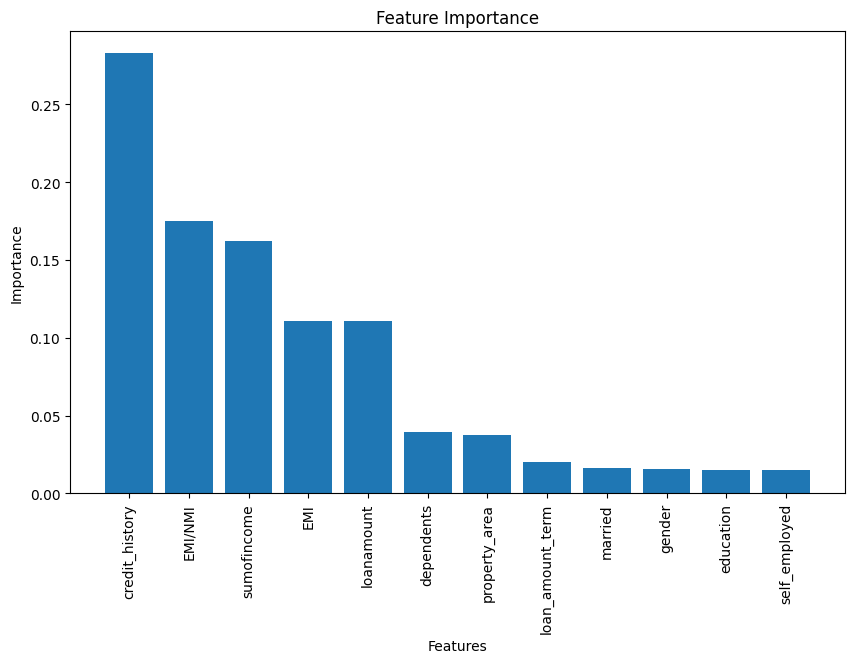

In [188]:
#Checking Feature Importance

# Train the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train1_x, train1_y)

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = train1_x.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [189]:
# Applying Theil's U for checking feature importance.
import warnings

# Ignoring specific warning category
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ignoring all warnings
warnings.filterwarnings("ignore")

from scipy.stats import entropy

def theils_u(x, y):
    p_xy = pd.crosstab(x, y, normalize='all')
    p_x = p_xy.sum(axis=1)
    p_y_given_x = p_xy.div(p_x, axis=0)
    p_y = y.value_counts(normalize=True)
    information_value = (p_y_given_x * np.log(p_y_given_x / p_y)).sum().sum()
    entropy_y = entropy(p_y)
    if entropy_y == 0:
        return 1.0
    else:
        return information_value / entropy_y

# Calculating Theil's U for each feature
theils_u_scores = []
for feature in train1_x.columns:
    u_score = theils_u(train1_x[feature], train1_y)
    theils_u_scores.append(u_score)
#theils_u_scores.sort(reverse=True) 
# Print Theil's U scores for each feature
print("\n\nTheil's U scores:")
for feature, score in zip(train1_x.columns, theils_u_scores):
    print(f"{feature}: {score}")
    #Theil's U scores provide insights into the information shared between each feature and the target variable. 
#EMI/NMI Ratio: The EMI/NMI Ratio, credit history and sumofincome variables have high Theil's U score, 
#indicating it carries a large amount of information or predictability for the target variable.



Theil's U scores:
gender: 0.0048427660537434134
married: 0.5960545796884685
dependents: 0.011300863778350555
education: 6.7665395148631515e-06
self_employed: 0.0008764292849413805
loanamount: 100.57311022748921
loan_amount_term: 3.1853139310050103
credit_history: 1.4296716451437481
property_area: 0.0032429857702408736
sumofincome: 478.773846656501
EMI: 153.68760760031068
EMI/NMI: 572.6881914417675


In [190]:
#Recursive Feature Elimination (RFE):
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=1)
rfe.fit(train1_x, train1_y)

# Get feature rankings
feature_rankings = rfe.ranking_

# Print feature importances
for rank, feature in zip(feature_rankings, feature_names):
    print(f"Rank {rank}: {feature}")
#Recursive Feature Elimination (RFE): RFE is a wrapper method that recursively eliminates features from a model and 
#ranks them based on their importance. It starts by training the model on all features and then recursively 
#eliminates the least important features until a specified number of features is reached. The ranking is based on the order of elimination. The feature ranking obtained from RFE can provide insights into the importance of each feature.


Rank 9: gender
Rank 10: married
Rank 6: dependents
Rank 11: education
Rank 12: self_employed
Rank 5: loanamount
Rank 8: loan_amount_term
Rank 3: credit_history
Rank 7: property_area
Rank 2: sumofincome
Rank 4: EMI
Rank 1: EMI/NMI


In [191]:
# Permutation Importance: Permutation importance measures the importance of a feature by randomly permuting its values
#and evaluating the decrease in model performance. A higher decrease in performance indicates that the feature is more
#important. This method provides a direct measure of feature importance without relying on a specific model.

# Train the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train1_x, train1_y)

# Calculate permutation importances
result = permutation_importance(model, train1_x, train1_y, random_state=42)

# Get feature importances
importances = result.importances_mean

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for importance, feature in zip(importances[sorted_indices], np.array(feature_names)[sorted_indices]):
    print(f"Importance: {importance}, Feature: {feature}")


Importance: 0.20496760259179267, Feature: credit_history
Importance: 0.1086393088552916, Feature: EMI/NMI
Importance: 0.07559395248380134, Feature: sumofincome
Importance: 0.06630669546436292, Feature: loanamount
Importance: 0.045140388768898546, Feature: EMI
Importance: 0.03801295896328298, Feature: dependents
Importance: 0.03736501079913612, Feature: property_area
Importance: 0.015118790496760326, Feature: married
Importance: 0.011663066954643675, Feature: self_employed
Importance: 0.010583153347732233, Feature: education
Importance: 0.009719222462203048, Feature: gender
Importance: 0.006263498920086463, Feature: loan_amount_term


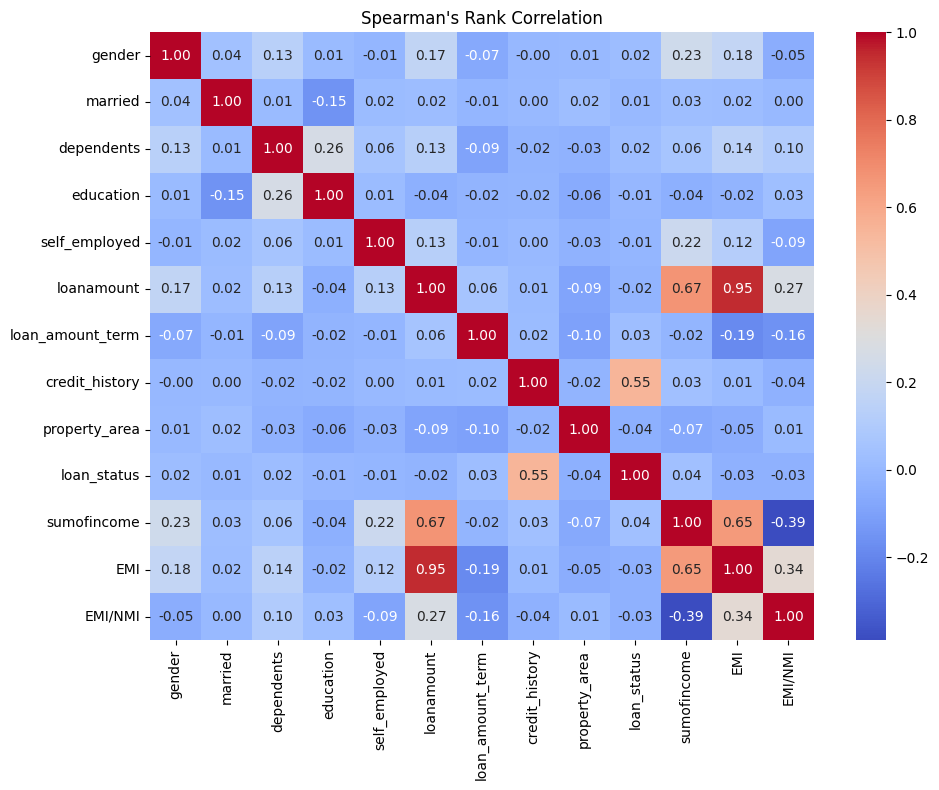

In [192]:

# Spearman's rank correlation

corr_matrix = df1.corr(method='spearman')

# Creating a figure and axes with adjusted size
fig, ax = plt.subplots(figsize=(10, 8))

# Visualizing Spearman's rank correlation with improved spacing
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, fmt=".2f", annot_kws={"size": 10})

# Rotating x-axis labels for better readability
#plt.xticks(rotation=45)

# Setting title and display the plot
plt.title("Spearman's Rank Correlation")
plt.tight_layout()  # Adjusting spacing between subplots
plt.show()


In [193]:
# Most important features : EMI/NMI, sumofincome, EMI, credit_history, loan_amount, dependents
#Least important features : Gender, Education, Married

# A Comparative Analysis of Classification Models

In [194]:
##Build the model and train the model
model = LogisticRegression()
model.fit(train1_x,train1_y)
predict=model.predict(test1_x)

# Calculate predictions
predict = model.predict(test1_x)

# Accuracy
accuracy1 = accuracy_score(test1_y, predict)

# Precision
precision1 = precision_score(test1_y, predict)

# F1 Score
f11 = f1_score(test1_y, predict)

# Confusion Matrix
conf_matrix = confusion_matrix(test1_y, predict)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity1 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity1 = true_negative / (true_negative + false_positive)

# Area Under the ROC Curve (AUC-ROC)
probabilities = model.predict_proba(test1_x)[:, 1]
auc_roc1 = roc_auc_score(test1_y, probabilities)

# Create the table
table_data = [
    ["Accuracy", accuracy1],
    ["Precision", precision1],
    ["F1 Score", f11],
    ["Sensitivity", sensitivity1],
    ["Specificity", specificity1],
    ["AUC-ROC", auc_roc1]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))
#Specificity is quite low

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.786408 |
+-------------+----------+
| Precision   | 0.772727 |
+-------------+----------+
| F1 Score    | 0.860759 |
+-------------+----------+
| Sensitivity | 0.971429 |
+-------------+----------+
| Specificity | 0.393939 |
+-------------+----------+
| AUC-ROC     | 0.704329 |
+-------------+----------+


In [195]:
# By taking only most important features accuracy inreased for LogiticRegression.

M = df1[['EMI/NMI', 'sumofincome', 'EMI', 'credit_history', 'loanamount' ,'dependents']]
n = df1['loan_status']

# Let's split the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.10, random_state= 1000)

# Creating a Random Forest Classifier model
model100 = LogisticRegression()

# Training the model
model100.fit(M_train, n_train)

# Predict
predict100=model100.predict(M_test)

# Calculate predictions
predict100 = model100.predict(M_test)

# Accuracy
accuracy2 = accuracy_score(n_test, predict100)

# Precision
precision2 = precision_score(n_test, predict100)

# F1 Score
f12 = f1_score(n_test, predict100)

# Confusion Matrix
conf_matrix = confusion_matrix(n_test, predict100)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity2 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity2 = true_negative / (true_negative + false_positive)

# Area Under the ROC Curve (AUC-ROC)
probabilities = model100.predict_proba(M_test)[:, 1]
auc_roc2 = roc_auc_score(n_test, probabilities)
# Create the table
table_data = [
    ["Accuracy", accuracy2],
    ["Precision", precision2],
    ["F1 Score", f12],
    ["Sensitivity", sensitivity2],
    ["Specificity", specificity2],
    ["AUC-ROC", auc_roc2]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))
#AUC > 0.5: The model has some discriminatory power and performs better than random guessing. The higher the AUC value
#the better the model's ability to distinguish between positive and negative samples.

#Specificity is still low.



+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.834951 |
+-------------+----------+
| Precision   | 0.815217 |
+-------------+----------+
| F1 Score    | 0.898204 |
+-------------+----------+
| Sensitivity | 1        |
+-------------+----------+
| Specificity | 0.392857 |
+-------------+----------+
| AUC-ROC     | 0.700952 |
+-------------+----------+


In [196]:

# Fit the logistic regression model
logit_model = sm.Logit(n_train, sm.add_constant(M_train))
logit_result = logit_model.fit()

# Calculate Cox and Snell pseudo R-squared
coxs_snell_pseudo_r2 = 1 - (logit_result.llf / logit_result.llnull)

# Print the pseudo R-squared
print("Cox and Snell Pseudo R-squared:", coxs_snell_pseudo_r2)
#The Cox and Snell pseudo R-squared value of 0.257 suggests that approximately 25.7% of the variation in the loan approval outcome can be explained by the predictor variables included in the model.


Optimization terminated successfully.
         Current function value: 0.461679
         Iterations 6
Cox and Snell Pseudo R-squared: 0.2572934197554809


In [197]:
#As specificity is low we will try undersampling, oversampling and SMOTE one by one.
#Undersampling
# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform random undersampling
M_train_resampled, n_train_resampled = rus.fit_resample(M_train, n_train)

# Train the model on the resampled data
model3 = LogisticRegression()
model3.fit(M_train_resampled, n_train_resampled)

# Calculate predictions
predict = model3.predict(M_test)

# Calculate performance metrics
accuracy3 = accuracy_score(n_test, predict)
precision3 = precision_score(n_test, predict)
recall3 = recall_score(n_test, predict)
f13 = f1_score(n_test, predict)
# Specificity (True Negative Rate)
specificity3 = true_negative / (true_negative + false_positive)
auc_roc3 = roc_auc_score(n_test, model3.predict_proba(M_test)[:, 1])

# Print the performance metrics
table_data = [
    ["Accuracy", accuracy3],
    ["Precision", precision3],
    ["Sensitivity", recall3],
    ["F1 Score", f13],
    ["Specificity", specificity3],
    ["AUC-ROC", auc_roc3]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.68932  |
+-------------+----------+
| Precision   | 0.811594 |
+-------------+----------+
| Sensitivity | 0.746667 |
+-------------+----------+
| F1 Score    | 0.777778 |
+-------------+----------+
| Specificity | 0.392857 |
+-------------+----------+
| AUC-ROC     | 0.703333 |
+-------------+----------+


In [198]:
#Oversampling
# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random oversampling
M_train_resampled, n_train_resampled = ros.fit_resample(M_train, n_train)

# Train the model on the resampled data
model4 = LogisticRegression()
model4.fit(M_train_resampled, n_train_resampled)

# Calculate predictions
predict = model4.predict(M_test)

# Calculate performance metrics
accuracy = accuracy_score(n_test, predict)
precision = precision_score(n_test, predict)
recall = recall_score(n_test, predict)
f1 = f1_score(n_test, predict)
specificity = true_negative / (true_negative + false_positive)
auc_roc = roc_auc_score(n_test, model4.predict_proba(M_test)[:, 1])

# Print the performance metrics
table_data = [
    ["Accuracy", accuracy],
    ["Precision", precision],
    ["Sensitivity", recall],
    ["F1 Score", f1],
    ["Specificity", specificity],
    ["AUC-ROC", auc_roc]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.504854 |
+-------------+----------+
| Precision   | 0.74     |
+-------------+----------+
| Sensitivity | 0.493333 |
+-------------+----------+
| F1 Score    | 0.592    |
+-------------+----------+
| Specificity | 0.392857 |
+-------------+----------+
| AUC-ROC     | 0.53381  |
+-------------+----------+


In [199]:
#SMOTE (Synthetic Minority Over-sampling Technique)
# Create an instance of SMOTE 
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
M_train_resampled, n_train_resampled = smote.fit_resample(M_train, n_train)

# Train the model on the resampled data
model5 = LogisticRegression()
model5.fit(M_train_resampled, n_train_resampled)

# Calculate predictions
predict = model5.predict(M_test)

# Calculate performance metrics
accuracy = accuracy_score(n_test, predict)
precision = precision_score(n_test, predict)
recall = recall_score(n_test, predict)
f1 = f1_score(n_test, predict)
specificity = true_negative / (true_negative + false_positive)
auc_roc = roc_auc_score(n_test, model4.predict_proba(M_test)[:, 1])

# Print the performance metrics
table_data = [
    ["Accuracy", accuracy],
    ["Precision", precision],
    ["Sensitivity", recall],
    ["F1 Score", f1],
    ["Specificity", specificity],
    ["AUC-ROC", auc_roc]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.456311 |
+-------------+----------+
| Precision   | 0.702128 |
+-------------+----------+
| Sensitivity | 0.44     |
+-------------+----------+
| F1 Score    | 0.540984 |
+-------------+----------+
| Specificity | 0.392857 |
+-------------+----------+
| AUC-ROC     | 0.53381  |
+-------------+----------+


In [200]:
#As all above sampling methods failed to improve sensitivity so we will try another algorithms

#RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(train1_x,train1_y)
predict=model2.predict(test1_x)

#Calculate accuracy
accuracy3 = accuracy_score(test1_y, predict)

# Calculate precision
precision3 = precision_score(test1_y, predict)

# Calculate recall
recall3 = recall_score(test1_y, predict)

# Calculate F1 score
f13 = f1_score(test1_y, predict)

# Calculate sensitivity (True Positive Rate or Recall)
sensitivity3 = recall

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(test1_y, predict).ravel()
specificity3 = tn / (tn + fp)

# Calculate AUC-ROC
probabilities = model2.predict_proba(test1_x)[:, 1]
auc_roc3 = roc_auc_score(test1_y, probabilities)

table_data = [
    ["Accuracy", accuracy3],
    ["Precision", precision3],
    ["F1 Score", f13],
    ["Sensitivity", sensitivity3],
    ["Specificity", specificity3],
    ["AUC-ROC", auc_roc3]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))



+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.786408 |
+-------------+----------+
| Precision   | 0.792683 |
+-------------+----------+
| F1 Score    | 0.855263 |
+-------------+----------+
| Sensitivity | 0.44     |
+-------------+----------+
| Specificity | 0.484848 |
+-------------+----------+
| AUC-ROC     | 0.781818 |
+-------------+----------+


In [201]:
# By taking only important features, accuracy inreased for RandomForestClassifier.

M = df1[['EMI/NMI','EMI', 'sumofincome','credit_history', 'loanamount', 'dependents']]
n = df1['loan_status']

# Let's split the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.1, random_state=42)

# Creating a Random Forest Classifier model
model200 = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model200.fit(M_train, n_train)

# Predict
predict200=model200.predict(M_test)

# Calculate predictions
predict200 = model200.predict(M_test)

# Accuracy
accuracy4 = accuracy_score(n_test, predict200)

# Precision
precision4 = precision_score(n_test, predict200)

# Recall
recall4 = recall_score(n_test, predict200)

# F1 Score
f14 = f1_score(n_test, predict200)

# Confusion Matrix
conf_matrix = confusion_matrix(n_test, predict200)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity4 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity4 = true_negative / (true_negative + false_positive)

# Area Under the ROC Curve (AUC-ROC)
probabilities = model200.predict_proba(M_test)[:, 1]
auc_roc4 = roc_auc_score(n_test, probabilities)

table_data = [
    ["Accuracy", accuracy4],
    ["Precision", precision4],
    ["F1 Score", f14],
    ["Sensitivity", sensitivity4],
    ["Specificity", specificity4],
    ["AUC-ROC", auc_roc4]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))





+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.873786 |
+-------------+----------+
| Precision   | 0.844156 |
+-------------+----------+
| F1 Score    | 0.909091 |
+-------------+----------+
| Sensitivity | 0.984848 |
+-------------+----------+
| Specificity | 0.675676 |
+-------------+----------+
| AUC-ROC     | 0.937142 |
+-------------+----------+


In [202]:
#"After exploring multiple techniques including oversampling, undersampling, and SMOTE, the logistic regression model 
#did not exhibit satisfactory performance, especially in terms of specificity (True Negative Rate). To address this 
#issue and mitigate potential financial implications, we implemented the random forest model. The random forest model 
#demonstrated significant improvements across all metrics, particularly in specificity, making it a more suitable 
#choice for loan approval prediction."

In [203]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [204]:
# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(train1_x, train1_y)

    # Predicting on the test data
    predict = model.predict(test1_x)

    # Calculating and returning the accuracy score
    accuracy = accuracy_score(test1_y, predict)
    return accuracy

# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params1 = study.best_params
best_accuracy1 = study.best_value

# Accuracy
accuracy5 = accuracy_score(test1_y, predict)

# Precision
precision5 = precision_score(test1_y, predict)

# Recall
recall5 = recall_score(test1_y, predict)

# F1 Score
f15 = f1_score(test1_y, predict)

# Confusion Matrix
conf_matrix = confusion_matrix(test1_y, predict)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity5 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity5 = true_negative / (true_negative + false_positive)

# Area Under the ROC Curve (AUC-ROC)
probabilities = model.predict_proba(test1_x)[:, 1]
auc_roc5 = roc_auc_score(test1_y, probabilities)

# Create the table

table_data = [
    ["Best Hyperparameters", best_params1],
    ["Best Accuracy", best_accuracy1],
    ["Precision", precision5],
    ["F1 Score", f15],
    ["Sensitivity", sensitivity5],
    ["Specificity", specificity5],
    ["AUC-ROC", auc_roc5]
]


# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))

[I 2023-06-26 00:41:44,905] A new study created in memory with name: no-name-5b827e31-2b98-4daa-b6bd-125e39f036ab
[I 2023-06-26 00:41:46,536] Trial 0 finished with value: 0.7766990291262136 and parameters: {'n_estimators': 900, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 0 with value: 0.7766990291262136.
[I 2023-06-26 00:41:46,761] Trial 1 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.7864077669902912.
[I 2023-06-26 00:41:47,193] Trial 2 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 8}. Best is trial 2 with value: 0.7961165048543689.
[I 2023-06-26 00:41:49,224] Trial 3 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 2 with value: 0.7961165048543689.
[I 2023-06-26 00:41:51,117] Trial 4 finished with value: 0.80582524271844

+----------------------+---------------------------------------------------------------+
| Metric               | Value                                                         |
+======================+===============================================================+
| Best Hyperparameters | {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 9} |
+----------------------+---------------------------------------------------------------+
| Best Accuracy        | 0.8058252427184466                                            |
+----------------------+---------------------------------------------------------------+
| Precision            | 0.7926829268292683                                            |
+----------------------+---------------------------------------------------------------+
| F1 Score             | 0.855263157894737                                             |
+----------------------+---------------------------------------------------------------+
| Sensitivity        

In [205]:
# With important features accuracy inreased by almost 5% for RandomForestClassifier post hyperparameter tuning using Optuna.

# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 25)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(M_train, n_train)

    # Predicting on the test data
    predict = model.predict(M_test)

    # Calculating and returning the accuracy score
    accuracy = accuracy_score(n_test, predict)
    return accuracy

# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params2 = study.best_params
best_accuracy2 = study.best_value

# Accuracy
accuracy6 = accuracy_score(n_test, predict)

# Precision
precision6 = precision_score(n_test, predict)


# F1 Score
f16 = f1_score(n_test, predict)

# Confusion Matrix
conf_matrix = confusion_matrix(n_test, predict)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity6 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity6 = true_negative / (true_negative + false_positive)



# Create the table

table_data = [
    ["Best Hyperparameters", best_params2],
    ["Best Accuracy", best_accuracy2],
    ["Precision", precision6],
    ["F1 Score", f16],
    ["Sensitivity", sensitivity6],
    ["Specificity", specificity6],

]


# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))

[I 2023-06-26 00:43:22,982] A new study created in memory with name: no-name-ab878707-0ae7-4227-b3e1-427888b8c59b
[I 2023-06-26 00:43:24,213] Trial 0 finished with value: 0.7766990291262136 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 0 with value: 0.7766990291262136.
[I 2023-06-26 00:43:24,711] Trial 1 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 8}. Best is trial 1 with value: 0.7961165048543689.
[I 2023-06-26 00:43:25,407] Trial 2 finished with value: 0.8446601941747572 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 5}. Best is trial 2 with value: 0.8446601941747572.
[I 2023-06-26 00:43:27,273] Trial 3 finished with value: 0.8155339805825242 and parameters: {'n_estimators': 900, 'max_depth': 21, 'min_samples_split': 7}. Best is trial 2 with value: 0.8446601941747572.
[I 2023-06-26 00:43:28,956] Trial 4 finished with value: 0.8349514563106

+----------------------+----------------------------------------------------------------+
| Metric               | Value                                                          |
+======================+================================================================+
| Best Hyperparameters | {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 2} |
+----------------------+----------------------------------------------------------------+
| Best Accuracy        | 0.8737864077669902                                             |
+----------------------+----------------------------------------------------------------+
| Precision            | 0.6463414634146342                                             |
+----------------------+----------------------------------------------------------------+
| F1 Score             | 0.7162162162162163                                             |
+----------------------+----------------------------------------------------------------+
| Sensitiv

In [206]:
# Applying Naive Bayes.


model_nb = GaussianNB()
model_nb.fit(train1_x, train1_y)
predict_nb = model_nb.predict(test1_x)
accuracy7 = accuracy_score(test1_y, predict_nb)
print('\n\nAccuracy Score on test data (Naive Bayes): \n\n')
print(accuracy_score(test1_y, predict_nb))




Accuracy Score on test data (Naive Bayes): 


0.6504854368932039


In [208]:
# With important features accuracy inreased  for Naive Bayes.
M = df1[['EMI/NMI', 'sumofincome', 'EMI','credit_history', 'loanamount', 'dependents']]
n = df1['loan_status']

# Splitting the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.1, random_state=1000)

# Creating a linear regression model
model300 = GaussianNB()

# Training the model
model300.fit(M_train, n_train)

# Predicting
predict300=model300.predict(M_test)


# Accuracy
accuracy8 = accuracy_score(n_test, predict300)

# Precision
precision8 = precision_score(n_test, predict300)



# F1 Score
f18 = f1_score(n_test, predict300)

# Confusion Matrix
conf_matrix = confusion_matrix(n_test, predict300)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity8 = true_positive / (true_positive + false_negative)

# Specificity (True Negative Rate)
specificity8 = true_negative / (true_negative + false_positive)

# Area Under the ROC Curve (AUC-ROC)
probabilities = model300.predict_proba(M_test)[:, 1]
auc_roc8 = roc_auc_score(n_test, probabilities)
table_data = [
    ["Accuracy", accuracy8],
    ["Precision", precision8],
    ["F1 Score", f18],
    ["Sensitivity", sensitivity8],
    ["Specificity", specificity8],
    ["AUC-ROC", auc_roc8]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.76699  |
+-------------+----------+
| Precision   | 0.762887 |
+-------------+----------+
| F1 Score    | 0.860465 |
+-------------+----------+
| Sensitivity | 0.986667 |
+-------------+----------+
| Specificity | 0.178571 |
+-------------+----------+
| AUC-ROC     | 0.675714 |
+-------------+----------+


In [210]:
! pip install prettytable
from prettytable import PrettyTable

# Define the rounded values
accuracy1_rounded = round(accuracy1, 2)
accuracy2_rounded = round(accuracy2, 2)
sensitivity2_rounded = round(sensitivity2, 2)
F12_rounded = round(f12, 2)
specificity2_rounded = round(specificity2, 2)

accuracy3_rounded = round(accuracy3, 2)
accuracy4_rounded = round(accuracy4, 2)
sensitivity4_rounded = round(sensitivity4, 2)
F14_rounded = round(f14, 2)
specificity4_rounded = round(specificity4, 2)

best_accuracy1_rounded = round(best_accuracy1, 2)
best_accuracy2_rounded = round(best_accuracy2, 2)
sensitivity6_rounded = round(sensitivity6, 2)
F16_rounded = round(f16, 2)
specificity6_rounded = round(specificity6, 2)

accuracy7_rounded = round(accuracy7, 2)
accuracy8_rounded = round(accuracy8, 2)
sensitivity8_rounded = round(sensitivity8, 2)
F18_rounded = round(f18, 2)
specificity8_rounded = round(specificity8, 2)

# Create the table
table = PrettyTable(['SL NO',"MODEL_NAME", "AccuracyAll","AccuracyImp",'Sensitivity','F1 Score','Specificity'])
table.add_row(['1','Logistic Regression', accuracy1_rounded, accuracy2_rounded, sensitivity2_rounded, F12_rounded, specificity2_rounded])
table.add_row(['2','Random Forest Classifier', accuracy3_rounded, accuracy4_rounded, sensitivity4_rounded, F14_rounded, specificity4_rounded])
table.add_row(['2','Random Forest Classifier using optuna', best_accuracy1_rounded, best_accuracy2_rounded, sensitivity6_rounded, F16_rounded, specificity6_rounded])
table.add_row(['3','Naive Bayes', accuracy7_rounded, accuracy8_rounded, sensitivity8_rounded, F18_rounded, specificity8_rounded])

# Print the table
print(table)


+-------+---------------------------------------+-------------+-------------+-------------+----------+-------------+
| SL NO |               MODEL_NAME              | AccuracyAll | AccuracyImp | Sensitivity | F1 Score | Specificity |
+-------+---------------------------------------+-------------+-------------+-------------+----------+-------------+
|   1   |          Logistic Regression          |     0.79    |     0.83    |     1.0     |   0.9    |     0.39    |
|   2   |        Random Forest Classifier       |     0.79    |     0.87    |     0.98    |   0.91   |     0.68    |
|   2   | Random Forest Classifier using optuna |     0.81    |     0.87    |     0.8     |   0.72   |     0.22    |
|   3   |              Naive Bayes              |     0.65    |     0.77    |     0.99    |   0.86   |     0.18    |
+-------+---------------------------------------+-------------+-------------+-------------+----------+-------------+


In [ ]:
#To sum up, our findings suggest that the Random Forest classifier without employing Optuna achieves the best results, particularly in terms of accuracy and specificity, with values of 0.87 and 0.68 respectively. This indicates that the model excels in accurately identifying negative instances, which is a valuable attribute for our analysis.